In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [3]:

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:

# Create and train the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)



AdaBoostClassifier(random_state=42)

In [5]:
# Make predictions and evaluate the model
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


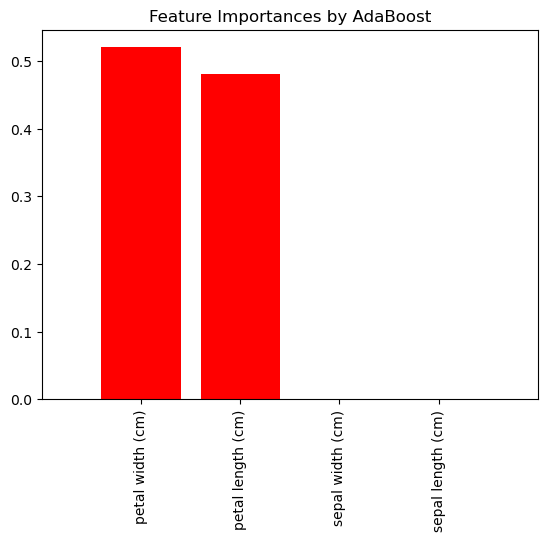

In [6]:

# Assuming ada_clf is an already trained AdaBoost classifier
# and X is the DataFrame containing feature columns

importances = ada_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sorting feature importance in descending order

plt.figure()
plt.title("Feature Importances by AdaBoost")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
